# REGRESSION 

Regression models (both linear and non linear) are used for predicting a continious real value , like salary for example )

## SIMPLE LINEAR REGRESSION 

### Assumptions of linear regression models

In [82]:
#DATA PREPROCESSING 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [84]:
dataset = pd.read_csv('Simple_Reg_data.csv')
X = dataset.iloc[:,0].values.reshape(-1,1) #reshaping to 2D array 
y = dataset.iloc[:,1].values     #target remains 1D 

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
print(X_test.flatten())
print(X_train.flatten()) 


[ 1.5 10.3  4.1  3.9  9.5  8.7]
[ 9.6  4.   5.3  7.9  2.9  5.1  3.2  4.5  8.2  6.8  1.3 10.5  3.   2.2
  5.9  6.   3.7  3.2  9.   2.   1.1  7.1  4.9  4. ]


In [86]:
#TRAINING THE SIMPLE REGRESSION MODEL ON THE TRAINING SET 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
#the method that we are going to use to train our regression model is the fit methd 
regressor.fit(X_train, y_train)  #fit is the method of LinearRegression class 


LinearRegression()

In [88]:
#PREDICTING THE TEST SET RESULT 
y_pred_test = regressor.predict(X_test) 
y_pred_train = regressor.predict(X_train) 

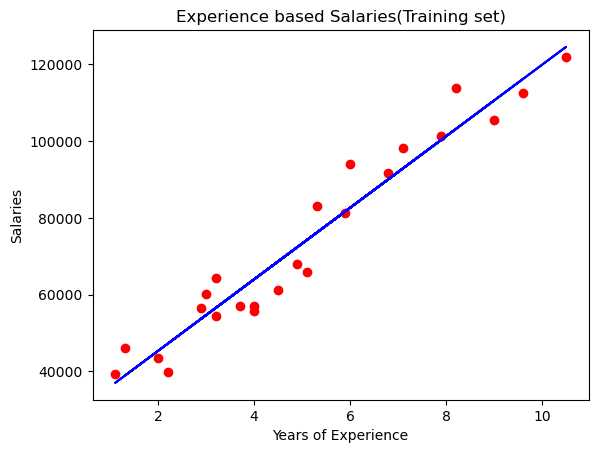

In [90]:
# y_test = real salaries given to us in the data table 
# y_pred_test = predicted salaries of the test set 
# y_pred_train = predicted salaries of the training set 

#VISUALISING THE TRAINING SET RESULTS 
plt.scatter(X_train, y_train, color = 'red') #scatter plot representing all the points of the training set 
plt.plot(X_train, y_pred_train, color = 'blue') 
plt.title('Experience based Salaries(Training set)') #title of the plot 
plt.xlabel('Years of Experience') #label to the x-axis 
plt.ylabel('Salaries') #label to the y-axis 
plt.show() 

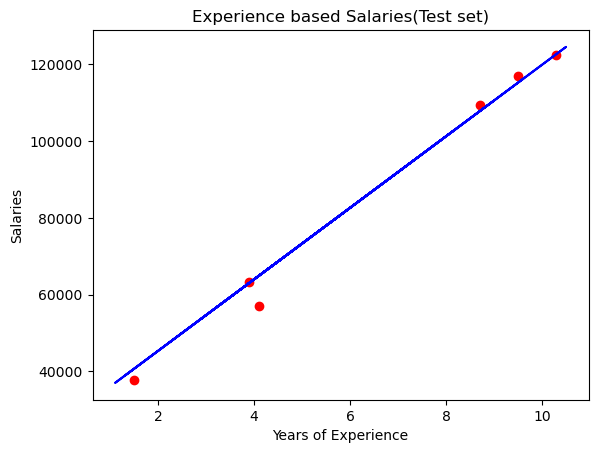

In [92]:
#VISUALISING THE TEST SET RESULTS 
plt.scatter(X_test, y_test, color = 'red') #scatter plot representing all the points of the test set 
plt.plot(X_train, y_pred_train, color = 'blue')   # regression line should be same so same line of code as above 
plt.title('Experience based Salaries(Test set)')  
plt.xlabel('Years of Experience') 
plt.ylabel('Salaries') 
plt.show() 

Key modifications: had to reshape X to 2D 

In [95]:
# Q1.) making a single prediction (for example the salary of an employee with 12 years of experience? )
print(regressor.predict([[12]])) 

[138531.00067138]


In [97]:
# Q2.) Getting the final linnear regression equation with the values of the coefficient 
print(regressor.coef_)
print(regressor.intercept_)

# the eqtion of the linear regression model is salary = (regressor.coef_) * YearsExperience + (regressor_intercept_)

[9312.57512673]
26780.099150628157


In [99]:
# salary = 9312.57 * YearsExperience + 26780

## MULTI-LINEAR REGRESSION 

### Assumptions of Multi -linear regression models 

Goal: The Goal of the MLR is to find the values of β1, β2.. βp that minimise the sum of square of residuals(SSE) ; typically achieved using OLS {same as Simple linear regression} 


In [104]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression 

#dataloading 
dataset = pd.read_csv('MultiLinear_data.csv') 
X = dataset.iloc[:,:4].values 
y = dataset.iloc[:,4].values 

#handeling categorical data 
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder='passthrough') 
X = np.array(ct.fit_transform(X))
#print(X) 

#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0) 



#### backward elimination 
#### IN MULTIPLE LINEAR REGRESSION THERE IS ABSOLUTELY NO NEED TO APPLY FEATURE SCALING as the features get multiplied with the coefficients 'β..' as it is
- you dont have to worry about the dummy variable trap here the class handels it automatically
- you dont have to manually do all the steps of backward elimination as well the class we call frm the scikit learn library already has a code for handling this 


In [107]:
#Training the multi-linear regression model on the training set 
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [109]:
#Predicting the test set 
y_pred_test = regressor.predict(X_test) 

#displaying the output for comparison 
np.set_printoptions(precision =2)    #this will display any numerical value with only two decimals after comma 
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1 ))  #.reshape-- to display the two vectors vertically into a array having y_pred_test number of rows , and just 1 column 
#1st argument of concatenate fun= y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)
#2nd argument axis: 0 = vertical concatenation ; 1 = horizontal concatenation 



[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [111]:
#preprocessing for Backward elimination 
data = pd.read_csv("MultiLinear_data.csv")
X = data.iloc[:,:4].values 
y = data.iloc[:,4].values

#handeling categorical data 
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder='passthrough') 
X = np.array(ct.fit_transform(X))
#print(X) 

#avoiding the dummy variable trap 
X =X[:,1:]

#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0) 

#fitting the linear regressor 
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

#predicting the test set 
y_pred = regressor.predict(X_test) 


import statsmodels.api as sm
 
X = np.append(arr=np.ones((50,1)).astype(int) , values = X ,axis =1)
#print(X)
#arr = array of 50 lines of 1's --> shortcut to do this np.ones((shape= 50 rows, 1 col).datatype, value = dataset where we want the column added, axis =1 ) #if line : axis = 0 , clumn : axis = 1 
#append adds column to the end of the set , hence I have interchanged the value of arr and values so that the new col will be at the begining of the dataset 

In [113]:
#Building the model using backward elimination 

#Step 2: fit the full model with all possible  predictors 
X_opt = X[:,[0,1,2,3,4,5]].astype(float) #new matrix of features, will only cntain features that contribute the most at the end 
#we write all the columns to be included individually as they will be removed one by one depending n thier contribution to prediction 

regressor_OLS = sm.OLS(endog=y, exog = X_opt).fit()  #endog = dependent variable , exog = matrix of features(X_opt) , fit() = fits OLS to X_opt and y 

#Step 3: Consider the predictor with the highest P-value . If P > SL , go to STEP 4 otherwise go to FIN 
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.34e-27
Time:                        18:47:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
X_opt = X[:,[0,1,3,4,5]].astype(float) #new matrix of features, will only cntain features that contribute the most at the end 
#we write all the columns to be included individually as they will be removed one by one depending n thier contribution to prediction 

regressor_OLS = sm.OLS(endog=y, exog = X_opt).fit()  #endog = dependent variable , exog = matrix of features(X_opt) , fit() = fits OLS to X_opt and y 

#Step 3: Consider the predictor with the highest P-value . If P > SL , go to STEP 4 otherwise go to FIN 
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           8.49e-29
Time:                        18:47:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
X_opt = X[:,[0,3,4,5]].astype(float) #new matrix of features, will only cntain features that contribute the most at the end 
#we write all the columns to be included individually as they will be removed one by one depending n thier contribution to prediction 

regressor_OLS = sm.OLS(endog=y, exog = X_opt).fit()  #endog = dependent variable , exog = matrix of features(X_opt) , fit() = fits OLS to X_opt and y 

#Step 3: Consider the predictor with the highest P-value . If P > SL , go to STEP 4 otherwise go to FIN 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           4.53e-30
Time:                        18:47:39   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
X_opt = X[:,[0,3,5]].astype(float) #new matrix of features, will only cntain features that contribute the most at the end 
#we write all the columns to be included individually as they will be removed one by one depending n thier contribution to prediction 

regressor_OLS = sm.OLS(endog=y, exog = X_opt).fit()  #endog = dependent variable , exog = matrix of features(X_opt) , fit() = fits OLS to X_opt and y 

#Step 3: Consider the predictor with the highest P-value . If P > SL , go to STEP 4 otherwise go to FIN 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           2.16e-31
Time:                        18:47:40   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
X_opt = X[:,[0,3]].astype(float) #new matrix of features, will only cntain features that contribute the most at the end 
#we write all the columns to be included individually as they will be removed one by one depending n thier contribution to prediction 

regressor_OLS = sm.OLS(endog=y, exog = X_opt).fit()  #endog = dependent variable , exog = matrix of features(X_opt) , fit() = fits OLS to X_opt and y 

#Step 3: Consider the predictor with the highest P-value . If P > SL , go to STEP 4 otherwise go to FIN 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.50e-32
Time:                        18:47:40   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## POLYNOMIAL LINEAR REGRESSION

#### we do not have a split of the dataset between a training set and a test set is because we want to leverage the maximum data in order to learn the correlations between the position levels and the salaries ( Only for this example) 

In [125]:
data = pd.read_csv("PolyLR.csv")
X = data.iloc[:,1].values.reshape(-1, 1)
y = data.iloc[:,-1].values 


#Training the linear regression model on the whole dataset 
from sklearn.linear_model import LinearRegression 
lin_regressor = LinearRegression() 
lin_regressor.fit(X,y) 


LinearRegression()

In [127]:
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree = 4)  #degree 4 fits perfectly 
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) 

LinearRegression()

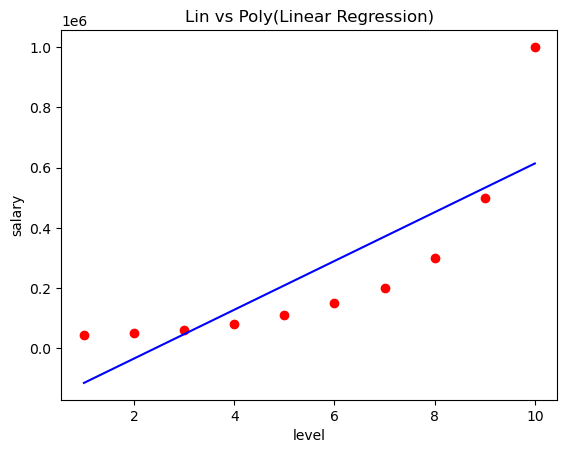

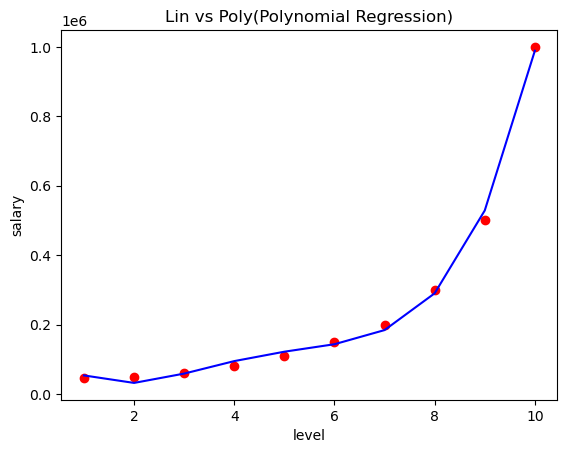

In [129]:
#visualising the linear regression results 
import matplotlib.pyplot as plt
plt.scatter(X,y, color ='red', )
plt.plot(X,lin_regressor.predict(X), color ='blue')
plt.title('Lin vs Poly(Linear Regression)')
plt.xlabel('level')
plt.ylabel('salary') 
plt.show()

#visualising the polynomial regression results 
import matplotlib.pyplot as plt
plt.scatter(X,y, color ='red', )
plt.plot(X,lin_reg_2.predict(X_poly), color ='blue')
plt.title('Lin vs Poly(Polynomial Regression)')
plt.xlabel('level')
plt.ylabel('salary') 
plt.show()


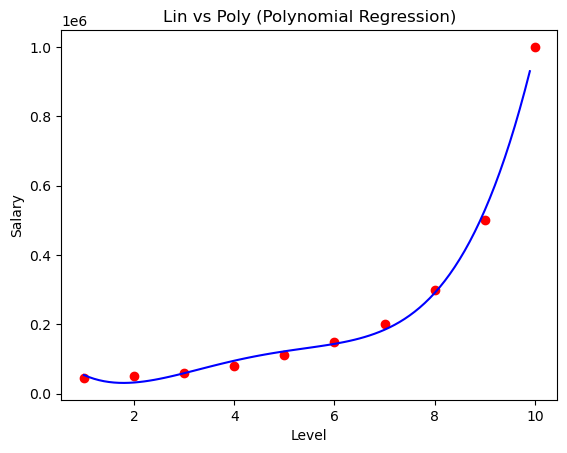

In [131]:
# Visualising the polynomial regression results (for higher resolution and smoother curve)
X_grid = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)  # Use `.min()` and `.max()` methods
X_grid_poly = poly_reg.transform(X_grid)  # Transform X_grid using the same poly_reg
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(X_grid_poly), color='blue')  # Predict using transformed X_grid
plt.title('Lin vs Poly (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [133]:
#predicting a new result(level = 6.5) with linear regression 
 
lin_regressor.predict([[6.5]])    #array is double pair of square brackets, 
                #pair [] 1st is 1D -->rows 
                #pair [[]] 2nd is 2D --> column
    

array([330378.79])

In [135]:
#predicting a new result(level = 6.5) with polynomial regression 
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

## SUPPORT VECTOR REGRESSION 

#### we do not have a split of the dataset between a training set and a test set is because we want to leverage the maximum data in order to learn the correlations between the position levels and the salaries 

In [139]:
#Non-Linear SVR 

#In the SVR model, there is no explicit equation relating the dependent variable to the features. Unlike linear models, SVR lacks coefficients multiplying each feature directly. Instead, it relies on an implicit relationship between the dependent variable and the features. As a result, feature scaling is necessary to ensure the model performs effectively.

dataset = pd.read_csv('PolyLR.csv')
X = dataset.iloc[:,1].values.reshape(-1,1) #reshaping to 2D array  
Y = dataset.iloc[:,-1].values
print(X)


#convert Y into 2D array as well bcuz standard scale class that will perform standardisation expects 2D format in its input & we are applying fs on both thats why 



[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [141]:
print(Y) 

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [143]:
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [145]:
#Feature Scaling 
#we have to apply feature scaling on both features(levels) and dependent variables (salary) as the values in both columns are so different that SVR may neglect values from features as they are far smaller than the range in which the salary values are, resulting in SVR to not work
#you dont apply feature scaling to dummy variables resulting from one-hot encoding 
#when the dependent variable takes binary values(0 & 1) you dont apply feature scaling they are already in the range 
#when dependent variable takes super high value wrt other freatures then you have to apply feature scaling , to put all the features and dependent variables in the same range 
#whenever you want to split your data into training set and test set , you apply fs after the split 

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

#we are not going to use the same standard scaler object on both X and Y  bcuz wehn you are going to fit the object SC on the data it is going to compute the mean and standard deviation of that same variable and as we dont have the same mean and standard deviation for X and Y we have to create two standard scaler objects 


Y = sc_y.fit_transform(Y)
np.set_printoptions(precision=8)  # Set precision to 8 decimal places
print(X)



[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [147]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [149]:
#Training the SVR model on the whole dataset 
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')    #we build the model 
model.fit(X,Y)
#this time we input a parameter , as we have kernels which can either learn some linear relationships which is linear kernel or could be a non-linear kernel(RBF radial basis)                        

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [151]:
#Predicting a new result 
model.predict(sc_x.transform([[6.5]])) #we must enter scaled value, as we have trained the model using the scaled value 

# Making a prediction for level 6.5 OR applying reverse scaling
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

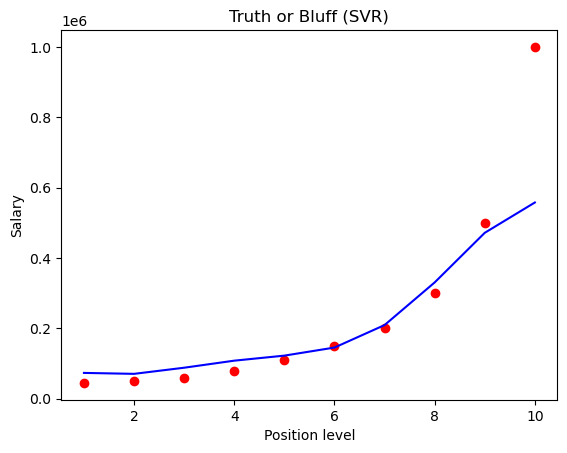

In [153]:
#visualising the SVR result 
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(model.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


/var/folders/pw/7q40b0ks1jn5d0bqnrb244c40000gn/T/ipykernel_68783/2170299984.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)


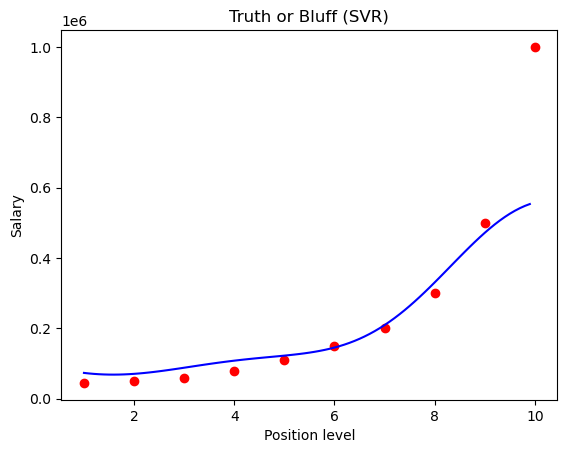

In [155]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(model.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Decision Tree Intuition

In [177]:
dataset = pd.read_csv("DecisionTree.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [179]:
#you dnt have to apply feature scaling for decision tree regression thats because the predictions from decision tree regression are resulting from successive splits of data therefore there are not some equations like the previous models
from sklearn.tree import DecisionTreeRegressor 
regressor3 = DecisionTreeRegressor(random_state=0)
regressor3.fit(X,y)


DecisionTreeRegressor(random_state=0)

In [181]:
regressor3.predict([[6.5]])

array([150000.])

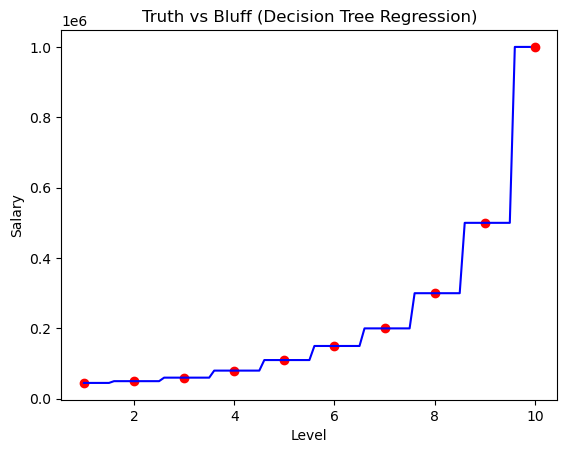

In [185]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor3.predict(X_grid), color='blue')  # Predict using transformed X_grid
plt.title('Truth vs Bluff (Decision Tree Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## The decision tree regression model is not the best adapted to two dimensional dataset, but this code can be used as a reference code for any other dataset when you wish to apply decision tree regression  

## RANDOM FOREST

In [194]:
dataset = pd.read_csv("randomForest.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [196]:
#you dnt have to apply feature scaling for random forest regression thats because the predictions from random forest regression are resulting from successive splits of data therefore there are not some equations like the previous models
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [198]:
regressor.predict([[6.5]])

array([167000.])

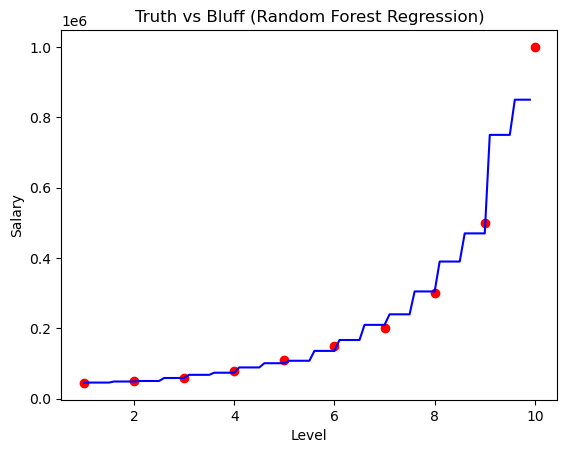

In [200]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')  # Predict using transformed X_grid
plt.title('Truth vs Bluff (Random Forest Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()